In [3]:
import fbprophet
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


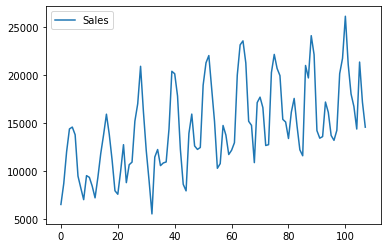

In [7]:
import pandas as pd
df = pd.read_csv("monthly-car-sales.csv", header=0)
display(df.head())
_ = df.plot()

In [9]:
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

model = fbprophet.Prophet()
# fit the model
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
predictions = model.predict(df)

In [16]:
predictions.head().T

,0,1,2,3,4
ds,1960-01-01 00:00:00,1960-02-01 00:00:00,1960-03-01 00:00:00,1960-04-01 00:00:00,1960-05-01 00:00:00
trend,9600.27,9704.27,9801.55,9905.54,10006.2
yhat_lower,4473.15,5193.61,11130.4,13319.7,14505.5
yhat_upper,7644.59,8444.71,14251.1,16406.2,17676.2
trend_lower,9600.27,9704.27,9801.55,9905.54,10006.2
trend_upper,9600.27,9704.27,9801.55,9905.54,10006.2
additive_terms,-3464.32,-2952.45,2943.12,4911.91,6158.05
additive_terms_lower,-3464.32,-2952.45,2943.12,4911.91,6158.05
additive_terms_upper,-3464.32,-2952.45,2943.12,4911.91,6158.05
yearly,-3464.32,-2952.45,2943.12,4911.91,6158.05


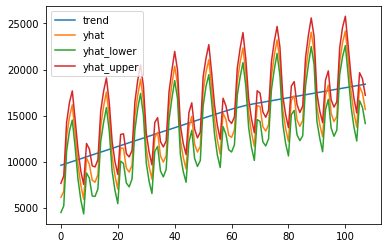

In [18]:
predictions[['trend','yhat','yhat_lower','yhat_upper']].plot()

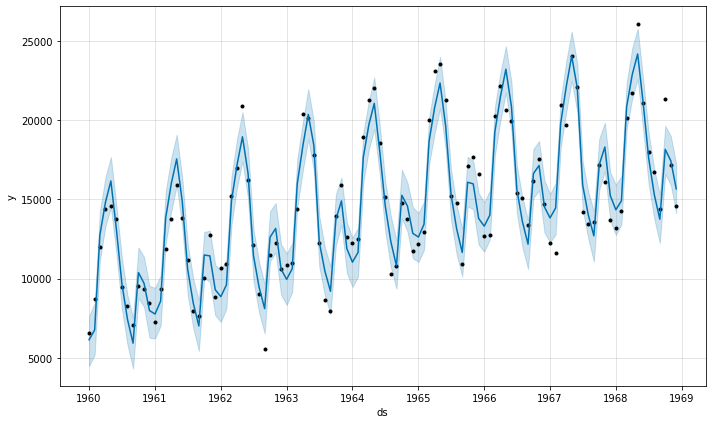

In [20]:
# Prophet's built in plotting capacity
_ = model.plot(predictions)

In [22]:
# out of sample forecast
future = list()
for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)

## The forecast here also include the previous training samples

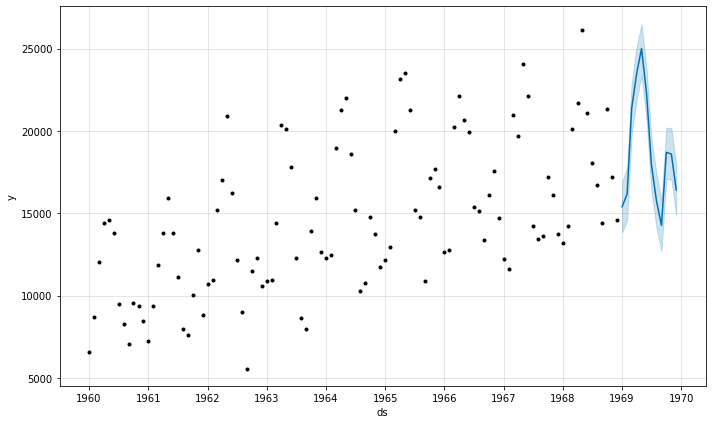

In [24]:
_ = model.plot(forecast)

## Can add in regressors
Source: https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors

Note that regressors must be added <b>prior to model fitting</b>. Prophet will also raise an error if the regressor is constant throughout the history, since there is nothing to fit from it.

The extra regressor <b>must be known </b> for both the history and for future dates. It thus must either be something that has known future values 
